
Описание проекта

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

Инструкция по выполнению проекта

Шаг 1.
Напишите парсер для сбора с сайта данных о 10 крупнейших фестивалях 2018 года Ссылка на сайт: https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html

Шаг 2.
Исследовательский анализ данных

Посчитайте, на самолётах какой модели было совершено больше всего рейсов в сентябре 2018 года. Назовите получившееся поле flights_amount и выведите его , также выведите поле model.
Посчитайте количество рейсов по всем моделям самолетов Boeing и Airbus в сентябре. Назовите получившуюся переменную flights_amount и выведите ее.
Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights , вместе с ней выведите столбец city.
Установите топ 10 наиболее популярныx маршрутов. Выведите такие столбцы: departure_airport , arrival_airport . Столбец с агрегированной информацией о количестве билетов ticket_amount.

Шаг 3.
Проверьте гипотезу, что количество рейсов во время фестивалей увеличивается

Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество билетов, купленных на рейсы в Москву. Выведите номер недели week_number и количество рейсов flights_amount.
Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.
Получите таблицу, в которой будет информация о количестве купленных за неделю билетов, отметка, проходил ли в эту неделю фестиваль, название фестиваля festival_name и номер недели week_number.

Шаг 4.
Аналитика средствами Python

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

query_1.csv — результат первого запроса.
В нём содержится информация о: model — модели самолета flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

query_3.csv — результат третьего запроса.
В нём содержится информация о: city — городах average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года Для этих двух наборов данных нужно:

импортировать файлы;
изучить данные в них;
проверить типы данных на корректность;
выбрать топ-10 городов по количеству рейсов;
построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
сделать выводы по каждому из графиков, пояснить результат.
Шаг 5.
Проверка гипотезы средствами Python

query_last.csv — результат последнего запроса. В нём следующая информация: week_number — номер недели; ticket_amount — количество проданных билетов за неделю; festival_week — есть ли на этой неделе фестиваль; festival_name — название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время». Пороговое значение alpha задайте самостоятельно.
Поясните: как вы формулировали нулевую и альтернативную гипотезы; какой критерий использовали для проверки гипотез и почему.


СОДЕРЖАНИЕ¶
1. Получение общей информации о данных
2. Топ-10 городов по количеству рейсов
3. Графический раздел
4. Проверить гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время». 
5. Итог

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [222]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [223]:
import seaborn as sns

1. Получение общей информации о данных

In [224]:
aircrafts = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')
festivals_flights = pd.read_csv('/datasets/query_last.csv')

In [225]:
def information(data):
    print('-- ИНФОРМАЦИЯ О ТАБЛИЦЕ --')
    print()
    print('----------------------------------------------')
    print(data.head(10))
    print('----------------------------------------------')
    print()
    print(data.info())

In [226]:
information(aircrafts)

-- ИНФОРМАЦИЯ О ТАБЛИЦЕ --

----------------------------------------------
                 model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185
----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


* В таблице 'aircrafts' отражены данные о совершавших перелеты суднах за сентябрь 2018 года. Пропуски отсутствуют, типы данных соответствуют ожидаемым - информация о моделях самолета хранится в "object", о количестве совершенных на них перелетах в сентябре - в типе данных "int". Предобработка не требуется.

In [227]:
information(city_flights)

-- ИНФОРМАЦИЯ О ТАБЛИЦЕ --

----------------------------------------------
           city  average_flights
0        Абакан         3.870968
1       Анадырь         1.000000
2         Анапа         2.161290
3   Архангельск         5.354839
4     Астрахань         2.451613
5       Барнаул         2.612903
6      Белгород         6.000000
7    Белоярский         2.000000
8  Благовещенск         1.000000
9        Братск         1.000000
----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


* В таблице 'city_flights' отражены данные о совершенных в среднем прилетах в сентябре 2018 года в города. Пропуски отсутствуют, типы данных соответствуют ожидаемым - информация о городах хранится в "object", о среднем количестве совершенных прилетов в сентябре - в типе данных "float". Предобработка не требуется.

In [228]:
information(festivals_flights)

-- ИНФОРМАЦИЯ О ТАБЛИЦЕ --

----------------------------------------------
   week_number  ticket_amount  festival_week festival_name
0           30          43568           30.0     Park Live
1           31          51034           31.0  Пикник Афиши
2           32          51675            NaN           NaN
3           33          51378            NaN           NaN
4           34          51492            NaN           NaN
5           35          51360            NaN           NaN
6           36          51386           36.0       Видфест
7           37          51670            NaN           NaN
8           38          51518            NaN           NaN
9           39          51623            NaN           NaN
----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 no

2. Топ-10 городов по количеству рейсов

In [229]:
# Отберем города с самыми наибольшими воздушными перелётами

top_10_city = city_flights.sort_values(by = 'average_flights', ascending = False).head(10).reset_index()
top_10_city

,index,city,average_flights
0,43,Москва,129.774194
1,70,Санкт-Петербург,31.161290
2,54,Новосибирск,17.322581
3,33,Красноярск,11.580645
4,20,Екатеринбург,11.322581
5,67,Ростов-на-Дону,10.193548
6,63,Пермь,10.129032
7,10,Брянск,10.000000
8,74,Сочи,9.612903
9,84,Ульяновск,9.580645


3. Графический раздел

In [230]:
def for_plot(data, x, y):
    """"призвана строить графики в единообразном стиле"""
    sns.set_palette('pastel')
    plt.figure(figsize=(18,4))
    sns.barplot(x = x, y = y, data = data)
    plt.title('Модели самолетов и количество рейсов')
    plt.xlabel('Модель самалёта')
    plt.xticks(rotation=90)
    plt.ylabel('количество рейсов')
    plt.palette = 'Blues'
    plt.show()
    print(data.sort_values(by = y, ascending = False).head(10).reset_index(drop=True))
    print('-------------------------------------')
    print('В среднем:', data[y].mean())
    print('-------------------------------------')

Модели самолетов и количество рейсов

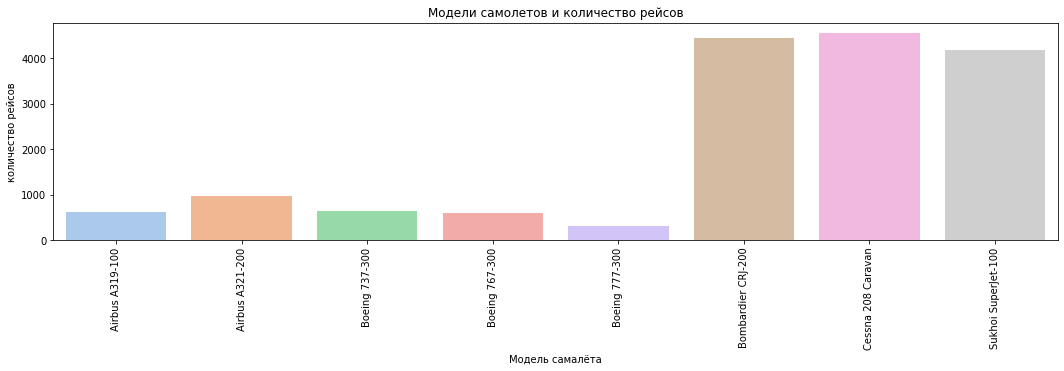

                 model  flights_amount
0   Cessna 208 Caravan            4557
1   Bombardier CRJ-200            4446
2  Sukhoi SuperJet-100            4185
3      Airbus A321-200             960
4       Boeing 737-300             630
5      Airbus A319-100             607
6       Boeing 767-300             600
7       Boeing 777-300             300
-------------------------------------
В среднем: 2035.625
-------------------------------------


In [231]:
for_plot(aircrafts, 'model', 'flights_amount')

Наиболее используемыми моделями являются "Cessna 208 Caravan" и "Bombardier CRJ-200 ".

Города и количество рейсов

In [232]:
def for_plot(data, x, y):
    """"призвана строить графики в единообразном стиле"""
    sns.set_palette('pastel')
    plt.figure(figsize=(18,4))
    sns.barplot(x = x, y = y, data = data)
    plt.title('Города и количество рейсов')
    plt.xlabel('Города')
    plt.xticks(rotation=90)
    plt.ylabel('количество рейсов')
    plt.palette = 'Blues'
    plt.show()
    print(data.sort_values(by = y, ascending = False).head(10).reset_index(drop=True))
    print('-------------------------------------')
    print('В среднем:', data[y].mean())
    print('-------------------------------------')

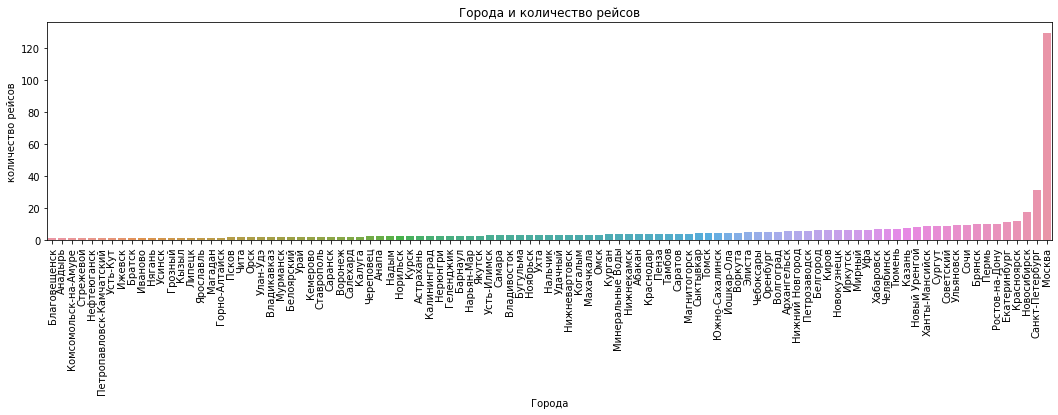

              city  average_flights
0           Москва       129.774194
1  Санкт-Петербург        31.161290
2      Новосибирск        17.322581
3       Красноярск        11.580645
4     Екатеринбург        11.322581
5   Ростов-на-Дону        10.193548
6            Пермь        10.129032
7           Брянск        10.000000
8             Сочи         9.612903
9        Ульяновск         9.580645
-------------------------------------
В среднем: 5.494189113891766
-------------------------------------


In [233]:
for_plot(city_flights.sort_values(by = 'average_flights'), 'city', 'average_flights')

В большинстве городов происходит не более 10 вылетов

Топ-10 городов и количество рейсов

In [234]:
def for_plot(data, x, y):
    """"призвана строить графики в единообразном стиле"""
    sns.set_palette('pastel')
    plt.figure(figsize=(18,4))
    sns.barplot(x = x, y = y, data = data)
    plt.title('Топ-10 городов и количество рейсов')
    plt.xlabel('Города')
    plt.xticks(rotation=90)
    plt.ylabel('количество рейсов')
    plt.palette = 'Blues'
    plt.show()
    print(data.sort_values(by = y, ascending = False).head(10).reset_index(drop=True))
    print('-------------------------------------')
    print('В среднем:', data[y].mean())
    print('-------------------------------------')

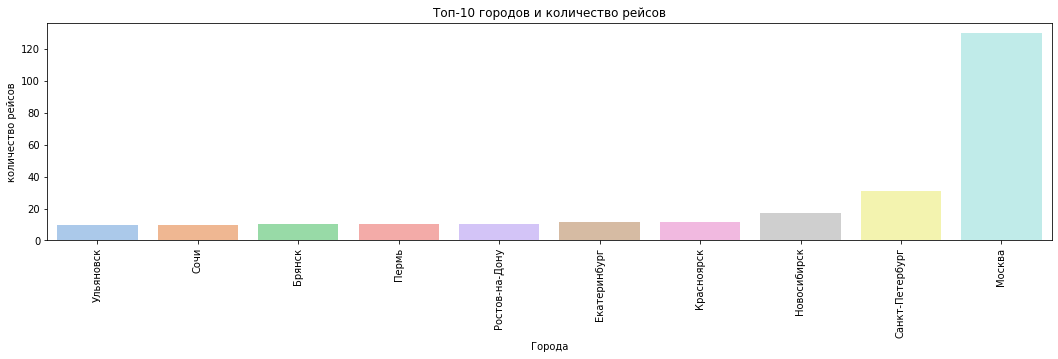

   index             city  average_flights
0     43           Москва       129.774194
1     70  Санкт-Петербург        31.161290
2     54      Новосибирск        17.322581
3     33       Красноярск        11.580645
4     20     Екатеринбург        11.322581
5     67   Ростов-на-Дону        10.193548
6     63            Пермь        10.129032
7     10           Брянск        10.000000
8     74             Сочи         9.612903
9     84        Ульяновск         9.580645
-------------------------------------
В среднем: 25.06774193548387
-------------------------------------


In [235]:
for_plot(top_10_city.sort_values(by = 'average_flights'), 'city', 'average_flights')

Наиболеее загруженные города, ожидаемо, Москва и Санкт-Петербург. Но Москва всё равно лидирует в колличестве перелётов.

4. Проверка гипотезы


Чтобы проверить представленную гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время», сформулируем нулевую гипотезу следующим образом, приняв пороговое значение alpha = 0.05:

средний спрос на билеты в обычное время равен среднему спросу на билеты во время фестивалей.

In [236]:
alpha = 0.05

In [237]:
results = st.ttest_ind(
    festivals_flights['ticket_amount'], festivals_flights.query('festival_week > 0.0')['ticket_amount']) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.32251818361504203
Не получилось отвергнуть нулевую гипотезу



p-значение: 0.32251818361504203
Не получилось отвергнуть нулевую гипотезу
По результатам проведенной проверки гипотезы зафиксируем:

спрос на билеты не зависит от проводимых фестивалей.

5. Итоговый вывод

По результатам проведенной аналитический работы можно сделать следующие выводы:

* наиболее задействованы в перелетах авиакомпании "F9" (сентябрь 2018 года) самолеты "Cessna 208 Caravan" (суммарно 4557 перелетов за месяц) и "Bombardier CRJ-200" (суммарно 4446 перелетов за месяц);
* суммарно в сентябре на самолетах Boeing (весь модельный ряд) совершено 1530 перелетов;
* суммарно в сентябре на самолетах Airbus (весь модельный ряд) совершено 1567 перелетов;
* в среднем за сентябрь 2018 года каждый город, отраженный в данных, в среднем принял 5 рейсов;
* топ-10 городов по насыщенности авиасообщения, осуществляемого силами авиакомпании "F9", возглявляют Москва (~ 130 рейсов в день) и Санкт-Петербург (~ 31 рейс в день);
* всего в сентябре 2018 в Москве было проведено 3 крупных Фестиваля: Park Live, Пикник Афиши, Видфест. Их проведение, в среднем, не повлияло на количество приобретенных билетов с пунктом назначения - Москва.